In [111]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn

In [112]:
df = pd.read_csv("/content/drive/MyDrive/datasets/GR week2/taxi_fare/train.csv")
df.head()

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
0,748.0,2.75,1.0,75.00,24,6.300,105.300,0
1,1187.0,3.43,1.0,105.00,24,13.200,142.200,0
2,730.0,3.12,1.0,71.25,0,26.625,97.875,1
3,671.0,5.63,3.0,90.00,0,9.750,99.750,0
4,329.0,2.09,1.0,45.00,12,13.200,70.200,0


In [113]:
df.isnull().any()

trip_duration         False
distance_traveled     False
num_of_passengers     False
fare                  False
tip                   False
miscellaneous_fees    False
total_fare            False
surge_applied         False
dtype: bool

In [114]:
corr = df.corr()
corr

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
trip_duration,1.000000,0.005774,-0.001477,0.150331,0.029132,0.046432,0.142159,0.029961
distance_traveled,0.005774,1.000000,-0.000299,0.035934,0.013487,0.021734,0.036677,0.005567
num_of_passengers,-0.001477,-0.000299,1.000000,0.013224,0.007277,0.010044,0.014234,0.006360
fare,0.150331,0.035934,0.013224,1.000000,0.302044,0.299321,0.966748,0.146687
tip,0.029132,0.013487,0.007277,0.302044,1.000000,0.320919,0.508639,0.239334
miscellaneous_fees,0.046432,0.021734,0.010044,0.299321,0.320919,1.000000,0.452568,0.715497
total_fare,0.142159,0.036677,0.014234,0.966748,0.508639,0.452568,1.000000,0.267350
surge_applied,0.029961,0.005567,0.006360,0.146687,0.239334,0.715497,0.267350,1.000000


<Axes: >

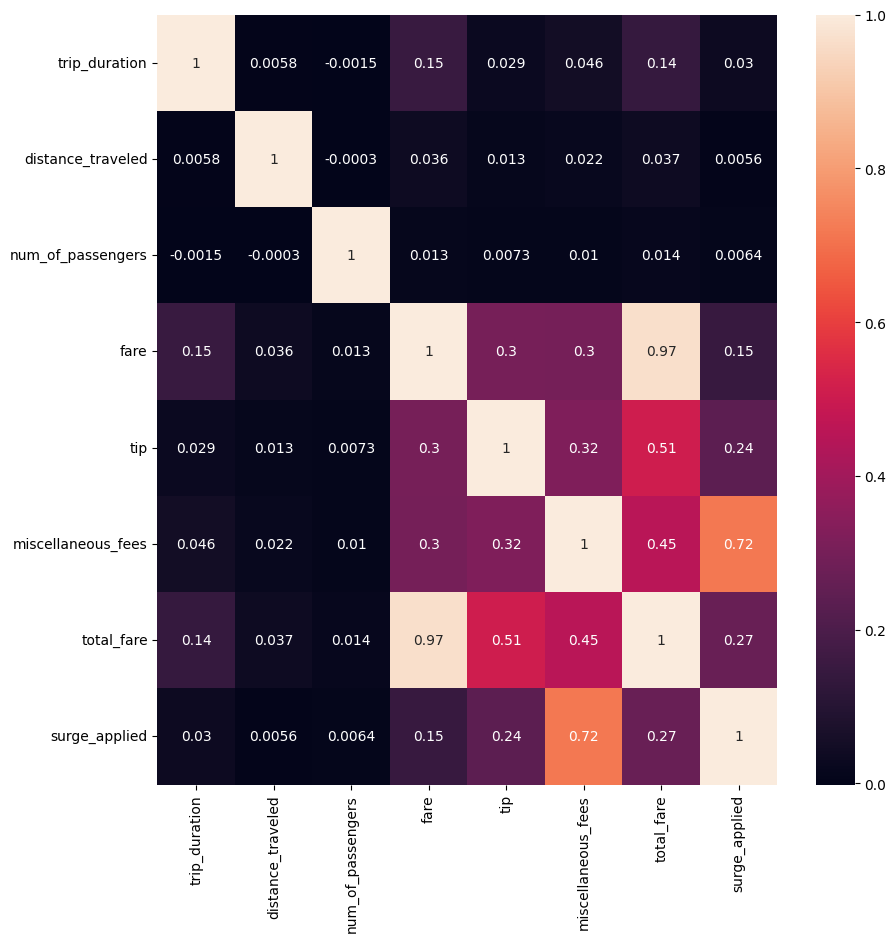

In [115]:
plt.figure(figsize= (10,10))
sn.heatmap(corr,annot = True)

In [116]:
df1 = df.drop(["num_of_passengers","trip_duration","distance_traveled"],axis = 1)
df1.head()

,fare,tip,miscellaneous_fees,total_fare,surge_applied
0,75.00,24,6.300,105.300,0
1,105.00,24,13.200,142.200,0
2,71.25,0,26.625,97.875,1
3,90.00,0,9.750,99.750,0
4,45.00,12,13.200,70.200,0


In [117]:
x = df1.drop("total_fare",axis = 1)
y = df1["total_fare"]
x.shape

(209673, 4)

In [118]:
def mean_normalize(df,rows):
  for i in df.columns:
    col = df[i]
    mean = col.mean()
    max = col.max()
    min = col.min()
    new_col = []
    for j in range(0,rows):
      df[i].iloc[j]=(df[i].iloc[j]-mean)/(max-min)

In [119]:
mean_normalize(x,209673)

<ipython-input-118-3371fa2cc7d3>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i].iloc[j]=(df[i].iloc[j]-mean)/(max-min)


In [162]:
class LinearRegression() :
    def __init__( self, lr, iters ) :
        self.lr = lr
        self.iters = iters
        self.weights = None
        self.bias = None

    def fit( self, X, Y ) :
        samples, features = X.shape
        self.weights = np.zeros( features )
        self.bias = 0
        for i in range( self.iters ) :
          Y_pred = self.bias + np.dot(X, self.weights)
          dw = (1/self.iters)*np.dot(X.T, (Y_pred- Y))
          db = (1/self.iters)*np.sum(Y_pred - Y)
          self.weights = self.weights - self.lr * dw
          self.bias = self.bias - self.lr * db
          if(i%50==0):
            print ("MSE at ",i+1,"st iteration : ",np.mean((Y_pred-Y)**2))

    def predict( self, X ) :
        Y_pred = self.bias + np.dot(X, self.weights)
        return Y_pred


In [121]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size= 0.3)

In [163]:
model = LinearRegression(0.01, 3500)
model.fit(x_train,y_train)

MSE at  1 st iteration :  26056.914097769655
MSE at  51 st iteration :  8858.961953602997
MSE at  101 st iteration :  8708.226804253158
MSE at  151 st iteration :  8560.360416833842
MSE at  201 st iteration :  8415.210501873908
MSE at  251 st iteration :  8272.72487064234
MSE at  301 st iteration :  8132.852377748264
MSE at  351 st iteration :  7995.542886623564
MSE at  401 st iteration :  7860.747249298541
MSE at  451 st iteration :  7728.417286588672
MSE at  501 st iteration :  7598.5057686822365
MSE at  551 st iteration :  7470.966396120654
MSE at  601 st iteration :  7345.753781163537
MSE at  651 st iteration :  7222.823429530637
MSE at  701 st iteration :  7102.13172251303
MSE at  751 st iteration :  6983.635899446016
MSE at  801 st iteration :  6867.2940405363815
MSE at  851 st iteration :  6753.065050036826
MSE at  901 st iteration :  6640.9086397605
MSE at  951 st iteration :  6530.7853129287105
MSE at  1001 st iteration :  6422.656348345062
MSE at  1051 st iteration :  6316.48

In [123]:
def mse (Y_pred, Y_test):
  return np.mean((Y_pred-Y_test)**2)

In [164]:
Y_pred = model.predict(x_test)
Y_pred

array([145.40960602, 162.32045399, 118.15623934, ..., 176.88305802,
       166.44447851, 111.00245259])

In [165]:
mse(Y_pred, y_test)

2872.5290037807295

In [126]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(x_train,y_train)

LinearRegression()

In [127]:
ypre= model1.predict(x_test)
ypre

array([193.5  , 146.625, 129.75 , ..., 180.375, 242.25 , 106.2  ])

In [128]:
mse(ypre, y_test)

1.3665816522779342e-25

In [129]:
model1.score(x_test,y_test)

1.0